In [28]:
# imports

import numpy as np
import pandas as pd
import statsmodels.api as sm 

from pandas.plotting import scatter_matrix
from matplotlib.pyplot import subplots

In [ ]:
# injest data

auto_temp = pd.read_csv('./Auto.csv').dropna();
auto = auto_temp[auto_temp['horsepower'].str.isnumeric()].astype({ 'horsepower': 'int' })

In [ ]:
# (a)

scatter_matrix(auto, alpha = 0.2, figsize = (12, 12));

In [ ]:
# (b)

# get rid of non-numeric columns
reduced_columns = auto.columns.drop('name')
reduced_auto = auto[reduced_columns]

# calclulate correlations between the variables
reduced_auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [27]:
# (c)

Y = auto['mpg']
X = pd.DataFrame({
                    'intercept': np.ones(auto.shape[0]),                                          
                    'cylinders': auto['cylinders'],
                    'displacement': auto['displacement'],
                    'horsepower': auto['horsepower'],
                    'weight': auto['weight'],
                    'acceleration': auto['acceleration'],
                    'year': auto['year'],
                    'origin': auto['origin']
                  })

model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 28 Nov 2024   Prob (F-statistic):          2.04e-139
Time:                        17:37:32   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(c)
    i   - yes, big F-statistic indicates relationship between the predictors and the response
    ii  - statistically signifcant predictors, based on P>|t|:  displacement, weight, year, origin
    iii - older car = more miles on 1 gallon

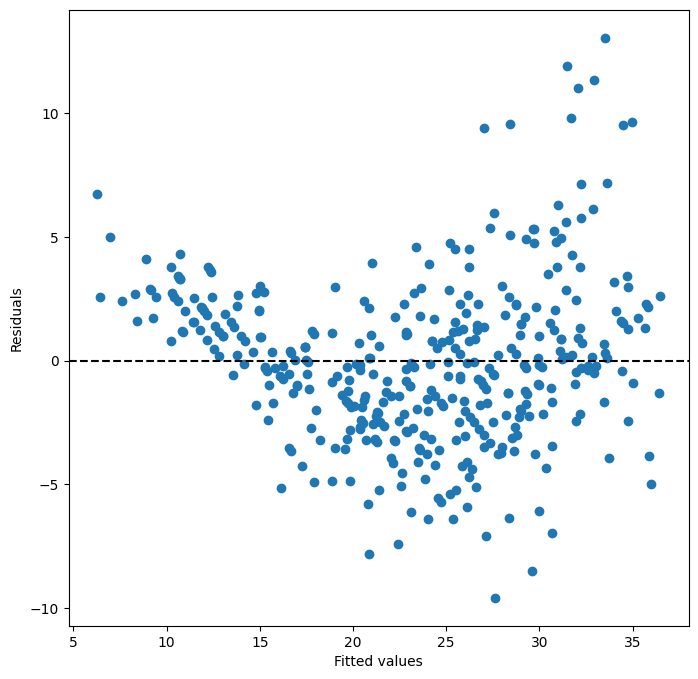

In [ ]:
# (d)

ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.axhline(0, c='k', ls='--')

# large outliers at ~27, ~34

In [ ]:
# (e)

# fit cylinders * displacement and displacement * weight 
cylinders = auto['cylinders'].to_numpy()
displacement = auto['displacement'].to_numpy()
weight = auto['weight'].to_numpy()

Y2 = auto['mpg'].array
X2 = pd.DataFrame({
                    'intercept': np.ones(auto.shape[0]),                                          
                    'cyl*dis': cylinders * displacement,
                    'dis*wei': displacement * weight
                  })

model2 = sm.OLS(Y2, X2)
results2 = model2.fit()
results2.summary()

# based on results P>|t|: interaction displacement * weight is statistically signifcant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     329.5
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           1.94e-84
Time:                        20:00:07   Log-Likelihood:                -1166.9
No. Observations:                 392   AIC:                             2340.
Df Residuals:                     389   BIC:                             2352.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     31.2575      0.388     80.472      0.000      30.494      32.021
cyl*dis       -0.0007      0.001     -0.560      0.576      -0.003       0.002
dis*wei    -1.041e-05   2.55e-06     -4.090      0.000   -1.54e-05   -5.41e-06
==============================================================================
Omnibus:                       39.853   Durbin-Watson:                   0.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.066
Skew:                           0.768   Prob(JB):                     8.15e-12
Kurtosis:                       3.876   Cond. No.                     1.36e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""